In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(f"../data/verp_data_EU.csv",encoding="iso-8859-1",sep=";",decimal=",")

In [9]:
column_types = df.dtypes
print(column_types)

caseid         object
KEY            object
verid           int64
date           object
maand           int64
weekdag        object
thuis_prov     object
thuisNIS        int64
thuis_sted     object
thuisadres     object
ver_post      float64
ver_sted       object
ver_prov       object
vu            float64
vm            float64
bes_post      float64
bes_sted       object
bes_prov       object
au            float64
am            float64
sexe           object
leeft         float64
dip            object
rybewys        object
statuut        object
ledena        float64
fietsa        float64
autoa         float64
hfdvm          object
atotkm        float64
ttotmin       float64
motief11       object
doelm          object
ritten          int64
dtype: object


In [3]:
y = df['hfdvm']
y.fillna("None")
features = df.drop(['caseid','KEY','verid','hfdvm','date','thuisadres'],axis=1)
features =  pd.get_dummies(features)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=2)


In [14]:
from sklearn import tree
#HYPERPAREMETER: experimenteer met de diepte
diepte = 10

decTree = tree.DecisionTreeClassifier() 
decTree.fit(X_train, y_train)
predictions = decTree.predict(X_test)


In [29]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, predictions,output_dict=True)
report

{'Efiets': {'precision': 0.3211009174311927,
  'recall': 0.37433155080213903,
  'f1-score': 0.345679012345679,
  'support': 187.0},
 'anders': {'precision': 0.23469387755102042,
  'recall': 0.3026315789473684,
  'f1-score': 0.26436781609195403,
  'support': 76.0},
 'autob': {'precision': 0.8271446862996159,
  'recall': 0.8452336448598131,
  'f1-score': 0.8360913377091616,
  'support': 5350.0},
 'autocar': {'precision': 0.2564102564102564,
  'recall': 0.2857142857142857,
  'f1-score': 0.2702702702702703,
  'support': 70.0},
 'autop': {'precision': 0.6228315612758814,
  'recall': 0.6132231404958678,
  'f1-score': 0.6179900055524709,
  'support': 1815.0},
 'bestelw': {'precision': 0.3333333333333333,
  'recall': 0.1724137931034483,
  'f1-score': 0.22727272727272727,
  'support': 29.0},
 'brommer': {'precision': 0.27906976744186046,
  'recall': 0.22641509433962265,
  'f1-score': 0.25,
  'support': 53.0},
 'bus': {'precision': 0.58,
  'recall': 0.5708661417322834,
  'f1-score': 0.5753968253

In [18]:
conf_matrix = confusion_matrix(y_test, predictions)


In [19]:
import numpy as np
true_labels = np.array(X_test)
predicted_labels = np.array(predictions)

# Get the unique labels
labels = np.unique(true_labels)



In [20]:
conf_matrix = confusion_matrix(y_test, predictions)


TypeError: '<' not supported between instances of 'float' and 'str'

In [26]:
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


<Axes: >

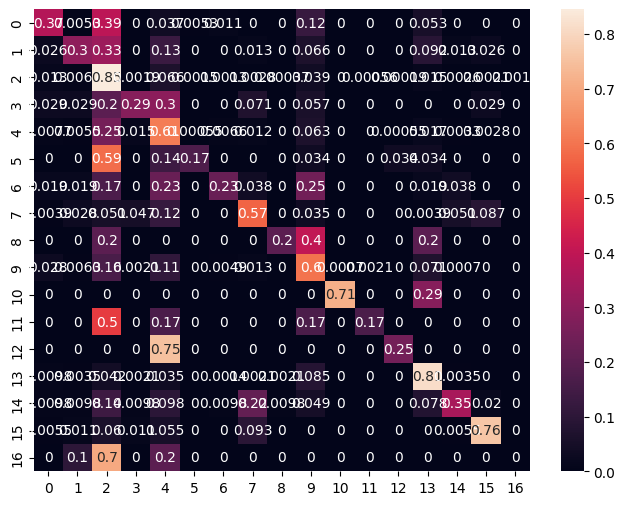

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True)

KeyboardInterrupt: 

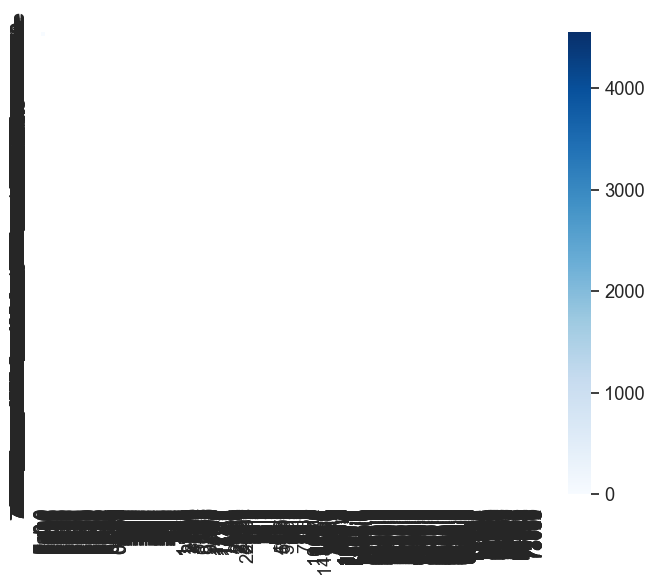

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Get the unique labels
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale if necessary
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [43]:
class_names = list(report.keys())[:-1]  # excluding 'accuracy' key
class_names

['Efiets',
 'anders',
 'autob',
 'autocar',
 'autop',
 'bestelw',
 'brommer',
 'bus',
 'estep',
 'fiets',
 'geen_antwoord',
 'motor',
 'taxi',
 'te_voet',
 'tm',
 'trein',
 'vrachtw',
 'accuracy',
 'macro avg']

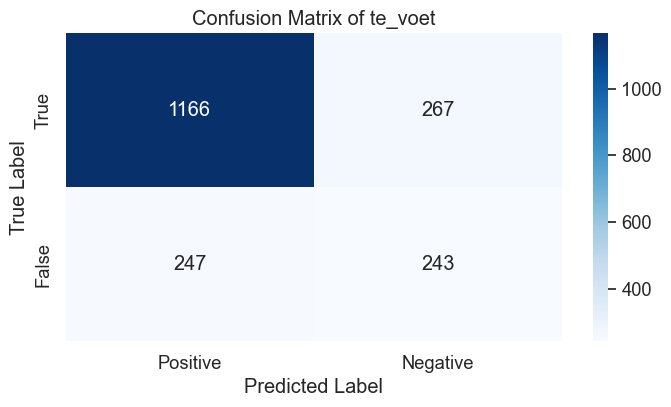

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Given metrics
class_name = 'te_voet'
metrics_dict = report[class_name]
# Extract precision, recall, and support
precision = metrics_dict['precision']
recall = metrics_dict['recall']
support = metrics_dict['support']

# Compute true positives and false negatives
TP = recall * support
FN = support - TP

# Estimate true negatives and false positives
total_positive = TP / precision
total_negative = FN / (1 - recall)

TN = total_negative - (precision * total_negative)  # Estimation of TN
FP = total_positive - TP  # Estimation of FP

# Reshape the values into a matrix
confusion_matrix_values = np.array([[TP, FN], [TN, FP]])

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2)  # Adjust font scale if necessary
heatmap = sns.heatmap(confusion_matrix_values, annot=True, fmt=".0f", cmap="Blues", xticklabels=['Positive', 'Negative'], yticklabels=['True', 'False'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix of '+class_name)
plt.show()